# Testing different models of questionnaire similarity

Trait similarity can be represented in various manners, and the choice of distance metric influences our analyses and results based on our initial assumptions. Therefore, as a preliminary analysis, we assessed three distinct assumptions about the structure of inter-subject SPSQ-SF score (dis)similarity.

In [2]:
import os
os.chdir('/project/3013104.01')
os.getcwd()

'/project/3013104.01'

# Concatenate all ROI volumes, ordered based on aural framing condition

In [7]:
import os
import pandas as pd
import shutil

output_dir = 'analysis/aural_framing_by_movie_topic/z_roi_node/data/concatenated/all'
working_dir = 'analysis/aural_framing_by_movie_topic/z_roi_node/data'

# Delete the output directory if it exists
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)

# Create the output directory
os.makedirs(output_dir)

# Get a list of all CSV files in the working directory
csv_files = [filename for filename in os.listdir(working_dir) if filename.endswith('.csv')]

# Define the order of labels and their corresponding index
order = {
    'none': 0,
    'neutral_climate_change': 1,
    'neutral_healthcare': 2,
    'neutral_immigration': 3,
    'threat_climate_change': 4,
    'threat_healthcare': 5,
    'threat_immigration': 6,
    'blame_climate_change': 7,
    'blame_healthcare': 8,
    'blame_immigration': 9,
}

# Sorting function considering order and 'NA' values
def custom_sort_key(filename):
    label = filename.rsplit('_', 1)[-1].split('.')[0]
    return order.get(label, len(order)), label

# Process each subject
for subject_id in set([filename.split('_')[0] for filename in csv_files]):
    subject_files = [filename for filename in csv_files if filename.startswith(subject_id + '_')]

    # Filter files to include only those with 'neutral' labels
    #subject_files = [filename for filename in subject_files if "neutral" in filename]

    if subject_files:  # Check if there are files to concatenate
        # Sort the filtered subject files using the custom sorting function
        subject_files.sort(key=custom_sort_key)

        # Initialize an empty list to store the data
        data_frames = []

        for i, filename in enumerate(subject_files):
            data = pd.read_csv(os.path.join(working_dir, filename), header=None, index_col=None)

            # Remove headers from all dataframes except the first one
            if i != 0:
                data = data.iloc[1:]

            # Append the data to the list
            data_frames.append(data)

        # Concatenate 
        concatenated_data = pd.concat(data_frames, ignore_index=True)

        # Fill blanks with 'NA'
        concatenated_data = concatenated_data.fillna('NA')

        # Save the concatenated data to the output directory
        output_filename = os.path.join(output_dir, f'{subject_id}_z_concat.csv')
        concatenated_data.to_csv(output_filename, index=False, header=False)

print("Concatenation and saving complete.")

Concatenation and saving complete.


## Handle NA values

In [8]:
import os
import pandas as pd

output_dir = 'analysis/aural_framing_by_movie_topic/z_roi_node/data/concatenated/all'

# Iterate over each CSV file in the output directory
for filename in os.listdir(output_dir):
    if filename.endswith('.csv'):
        file_path = os.path.join(output_dir, filename)
        # Read the CSV file
        data = pd.read_csv(file_path, header=None)
        # Check if the file has fewer than 706 rows
        if len(data) < 706:
            # Calculate the number of rows to fill with 'NA'
            rows_to_fill = 706 - len(data)
            # Create a DataFrame with 'NA' values to append
            blank_data = pd.DataFrame([['NA'] * len(data.columns)] * rows_to_fill)
            # Append the blank rows to the data
            data = data.append(blank_data, ignore_index=True)
            # Write the modified data back to the CSV file
            data.to_csv(file_path, index=False, header=False)

print("Blank cell filling complete.")

Blank cell filling complete.


In [9]:
import os
import pandas as pd

output_dir = 'analysis/aural_framing_by_movie_topic/z_roi_node/data/concatenated/all'

# Iterate over each CSV file in the output directory
for filename in os.listdir(output_dir):
    if filename.endswith('.csv'):
        file_path = os.path.join(output_dir, filename)
        # Read the CSV file
        data = pd.read_csv(file_path, header=None)
        # Fill blank cells with 'NA'
        data = data.fillna('NA')
        # Write the modified data back to the CSV file
        data.to_csv(file_path, index=False, header=False)

print("Blank cell filling complete.")

Blank cell filling complete.


# Calculate ISC per ROI and convert to dissimilarity and similarity

## Create 3d array

In [2]:
import os
import numpy as np
import pandas as pd

stacked_data = {}  

for frame in ['all']:
    working_dir = f'analysis/aural_framing_by_movie_topic/z_roi_node/data/concatenated/{frame}'  # Directory with concatenated ROI activation data
    subject_files = [f for f in os.listdir(working_dir) if f.endswith(".csv")]
    subject_files.sort()

    data_list = []

    for filename in subject_files:
        file_path = os.path.join(working_dir, filename)

        data = pd.read_csv(file_path, header=0, index_col=None, usecols=lambda col: col.lower() != 'volume').values
        #print(f"Data shape for {filename}: {data.shape}")  # Add this line to print the shape of each data array
        data_list.append(data)

    stacked_data[frame] = np.stack(data_list, axis=0)

    print(stacked_data[frame].shape)
    # 238 subjects x 705 TRs (i.e., number of timepoints across all runs) x 300 nodes (i.e., ROIs)

(238, 705, 300)


In [3]:
# Check subject_files sorting. Make sure it's the same order as the questionnaire similarity matrices.
for s in subject_files:
    print(s)

subject-0001_z_concat.csv
subject-0003_z_concat.csv
subject-0004_z_concat.csv
subject-0005_z_concat.csv
subject-0006_z_concat.csv
subject-0007_z_concat.csv
subject-0008_z_concat.csv
subject-0009_z_concat.csv
subject-0010_z_concat.csv
subject-0011_z_concat.csv
subject-0012_z_concat.csv
subject-0013_z_concat.csv
subject-0014_z_concat.csv
subject-0015_z_concat.csv
subject-0016_z_concat.csv
subject-0017_z_concat.csv
subject-0018_z_concat.csv
subject-0019_z_concat.csv
subject-0020_z_concat.csv
subject-0021_z_concat.csv
subject-0022_z_concat.csv
subject-0023_z_concat.csv
subject-0024_z_concat.csv
subject-0025_z_concat.csv
subject-0026_z_concat.csv
subject-0027_z_concat.csv
subject-0028_z_concat.csv
subject-0029_z_concat.csv
subject-0030_z_concat.csv
subject-0031_z_concat.csv
subject-0032_z_concat.csv
subject-0033_z_concat.csv
subject-0034_z_concat.csv
subject-0035_z_concat.csv
subject-0036_z_concat.csv
subject-0037_z_concat.csv
subject-0038_z_concat.csv
subject-0039_z_concat.csv
subject-0040

## Dissimilarity

In [10]:
import os
import numpy as np

# Specify the starting node; the script will begin at start_node+1
start_node = 136

for frame in ['all']:
    n_subs, n_ts, n_nodes = stacked_data[frame].shape

    # Output path
    directory_path = f"analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_{frame}"

    # Create the directory if it doesn't exist
    os.makedirs(directory_path, exist_ok=True)

    for node in range(start_node, n_nodes):
        print(f"Calculating similarity matrix for node {node + 1}/{n_nodes}")
        node_data = stacked_data[frame][:, :, node]

        similarity_matrix = np.empty((n_subs, n_subs))  # Define similarity_matrix

        for i in range(n_subs):
            for j in range(i, n_subs):  # Only calculate unique edges (i.e.,lower triangle)

                masked_data_i = np.ma.masked_invalid(node_data[i])
                masked_data_j = np.ma.masked_invalid(node_data[j])

                # Calculate Pearson correlation coefficient between two masked arrays 
                correlation = np.ma.corrcoef(masked_data_i, masked_data_j)[0, 1]

                # Convert correlation to dissimilarity (range [0, 2])
                dissimilarity = 1 - correlation 

                similarity_matrix[i, j] = dissimilarity
                similarity_matrix[j, i] = dissimilarity  # Fill upper triangle symmetrically

        # Set the diagonal elements to 0 because subjects are not dissimilar to themselves
        np.fill_diagonal(similarity_matrix, 0)

        # Save the similarity matrix to a CSV file
        csv_filename = f"{directory_path}/similarity_node_{node + 1}.csv"
        np.savetxt(csv_filename, similarity_matrix, delimiter=',')

        print(f"Exported similarity matrix for node {node + 1}/{n_nodes} to {csv_filename}")

Calculating similarity matrix for node 137/300
Exported similarity matrix for node 137/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_all/similarity_node_137.csv
Calculating similarity matrix for node 138/300
Exported similarity matrix for node 138/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_all/similarity_node_138.csv
Calculating similarity matrix for node 139/300
Exported similarity matrix for node 139/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_all/similarity_node_139.csv
Calculating similarity matrix for node 140/300
Exported similarity matrix for node 140/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_all/similarity_node_140.csv
Calculating similarity matrix for node 141/300
Exported similarity matrix for node 141/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_all/similarity_node_141.csv
Calculating sim

Exported similarity matrix for node 179/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_all/similarity_node_179.csv
Calculating similarity matrix for node 180/300
Exported similarity matrix for node 180/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_all/similarity_node_180.csv
Calculating similarity matrix for node 181/300
Exported similarity matrix for node 181/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_all/similarity_node_181.csv
Calculating similarity matrix for node 182/300
Exported similarity matrix for node 182/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_all/similarity_node_182.csv
Calculating similarity matrix for node 183/300
Exported similarity matrix for node 183/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_all/similarity_node_183.csv
Calculating similarity matrix for node 184/300
Exported simila

Exported similarity matrix for node 221/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_all/similarity_node_221.csv
Calculating similarity matrix for node 222/300
Exported similarity matrix for node 222/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_all/similarity_node_222.csv
Calculating similarity matrix for node 223/300
Exported similarity matrix for node 223/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_all/similarity_node_223.csv
Calculating similarity matrix for node 224/300
Exported similarity matrix for node 224/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_all/similarity_node_224.csv
Calculating similarity matrix for node 225/300
Exported similarity matrix for node 225/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_all/similarity_node_225.csv
Calculating similarity matrix for node 226/300
Exported simila

Exported similarity matrix for node 263/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_all/similarity_node_263.csv
Calculating similarity matrix for node 264/300
Exported similarity matrix for node 264/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_all/similarity_node_264.csv
Calculating similarity matrix for node 265/300
Exported similarity matrix for node 265/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_all/similarity_node_265.csv
Calculating similarity matrix for node 266/300
Exported similarity matrix for node 266/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_all/similarity_node_266.csv
Calculating similarity matrix for node 267/300
Exported similarity matrix for node 267/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_all/similarity_node_267.csv
Calculating similarity matrix for node 268/300
Exported simila

## Similarity

In [11]:
import os
import numpy as np

for frame in ['all']:
    n_subs, n_ts, n_nodes = stacked_data[frame].shape

    # Output path
    directory_path = f"analysis/inter-subject_matrices_fmri/roi_node/similarity_matrices_mfmri_{frame}"

    # Create the directory if it doesn't exist
    os.makedirs(directory_path, exist_ok=True)

    for node in range(n_nodes):
        print(f"Calculating similarity matrix for node {node + 1}/{n_nodes}")
        node_data = stacked_data[frame][:, :, node]

        similarity_matrix = np.empty((n_subs, n_subs))  # Define similarity_matrix

        for i in range(n_subs):
            for j in range(i, n_subs):  # Only calculate unique edges (i.e.,lower triangle)

                masked_data_i = np.ma.masked_invalid(node_data[i])
                masked_data_j = np.ma.masked_invalid(node_data[j])

                # Calculate Pearson correlation coefficient between two masked arrays 
                correlation = np.ma.corrcoef(masked_data_i, masked_data_j)[0, 1]

                similarity_matrix[i, j] = correlation
                similarity_matrix[j, i] = correlation  # Fill upper triangle symmetrically

        # Set the diagonal elements to 1 because subjects are similar to themselves
        np.fill_diagonal(similarity_matrix, 1)

        # Save the similarity matrix to a CSV file
        csv_filename = f"{directory_path}/similarity_node_{node + 1}.csv"
        np.savetxt(csv_filename, similarity_matrix, delimiter=',')

        print(f"Exported similarity matrix for node {node + 1}/{n_nodes} to {csv_filename}")

Calculating similarity matrix for node 1/300
Exported similarity matrix for node 1/300 to analysis/inter-subject_matrices_fmri/roi_node/similarity_matrices_mfmri_all/similarity_node_1.csv
Calculating similarity matrix for node 2/300
Exported similarity matrix for node 2/300 to analysis/inter-subject_matrices_fmri/roi_node/similarity_matrices_mfmri_all/similarity_node_2.csv
Calculating similarity matrix for node 3/300
Exported similarity matrix for node 3/300 to analysis/inter-subject_matrices_fmri/roi_node/similarity_matrices_mfmri_all/similarity_node_3.csv
Calculating similarity matrix for node 4/300
Exported similarity matrix for node 4/300 to analysis/inter-subject_matrices_fmri/roi_node/similarity_matrices_mfmri_all/similarity_node_4.csv
Calculating similarity matrix for node 5/300
Exported similarity matrix for node 5/300 to analysis/inter-subject_matrices_fmri/roi_node/similarity_matrices_mfmri_all/similarity_node_5.csv
Calculating similarity matrix for node 6/300
Exported simila

Exported similarity matrix for node 44/300 to analysis/inter-subject_matrices_fmri/roi_node/similarity_matrices_mfmri_all/similarity_node_44.csv
Calculating similarity matrix for node 45/300
Exported similarity matrix for node 45/300 to analysis/inter-subject_matrices_fmri/roi_node/similarity_matrices_mfmri_all/similarity_node_45.csv
Calculating similarity matrix for node 46/300
Exported similarity matrix for node 46/300 to analysis/inter-subject_matrices_fmri/roi_node/similarity_matrices_mfmri_all/similarity_node_46.csv
Calculating similarity matrix for node 47/300
Exported similarity matrix for node 47/300 to analysis/inter-subject_matrices_fmri/roi_node/similarity_matrices_mfmri_all/similarity_node_47.csv
Calculating similarity matrix for node 48/300
Exported similarity matrix for node 48/300 to analysis/inter-subject_matrices_fmri/roi_node/similarity_matrices_mfmri_all/similarity_node_48.csv
Calculating similarity matrix for node 49/300
Exported similarity matrix for node 49/300 to

Exported similarity matrix for node 87/300 to analysis/inter-subject_matrices_fmri/roi_node/similarity_matrices_mfmri_all/similarity_node_87.csv
Calculating similarity matrix for node 88/300
Exported similarity matrix for node 88/300 to analysis/inter-subject_matrices_fmri/roi_node/similarity_matrices_mfmri_all/similarity_node_88.csv
Calculating similarity matrix for node 89/300
Exported similarity matrix for node 89/300 to analysis/inter-subject_matrices_fmri/roi_node/similarity_matrices_mfmri_all/similarity_node_89.csv
Calculating similarity matrix for node 90/300
Exported similarity matrix for node 90/300 to analysis/inter-subject_matrices_fmri/roi_node/similarity_matrices_mfmri_all/similarity_node_90.csv
Calculating similarity matrix for node 91/300
Exported similarity matrix for node 91/300 to analysis/inter-subject_matrices_fmri/roi_node/similarity_matrices_mfmri_all/similarity_node_91.csv
Calculating similarity matrix for node 92/300
Exported similarity matrix for node 92/300 to

Exported similarity matrix for node 130/300 to analysis/inter-subject_matrices_fmri/roi_node/similarity_matrices_mfmri_all/similarity_node_130.csv
Calculating similarity matrix for node 131/300
Exported similarity matrix for node 131/300 to analysis/inter-subject_matrices_fmri/roi_node/similarity_matrices_mfmri_all/similarity_node_131.csv
Calculating similarity matrix for node 132/300
Exported similarity matrix for node 132/300 to analysis/inter-subject_matrices_fmri/roi_node/similarity_matrices_mfmri_all/similarity_node_132.csv
Calculating similarity matrix for node 133/300
Exported similarity matrix for node 133/300 to analysis/inter-subject_matrices_fmri/roi_node/similarity_matrices_mfmri_all/similarity_node_133.csv
Calculating similarity matrix for node 134/300
Exported similarity matrix for node 134/300 to analysis/inter-subject_matrices_fmri/roi_node/similarity_matrices_mfmri_all/similarity_node_134.csv
Calculating similarity matrix for node 135/300
Exported similarity matrix for

Exported similarity matrix for node 173/300 to analysis/inter-subject_matrices_fmri/roi_node/similarity_matrices_mfmri_all/similarity_node_173.csv
Calculating similarity matrix for node 174/300
Exported similarity matrix for node 174/300 to analysis/inter-subject_matrices_fmri/roi_node/similarity_matrices_mfmri_all/similarity_node_174.csv
Calculating similarity matrix for node 175/300
Exported similarity matrix for node 175/300 to analysis/inter-subject_matrices_fmri/roi_node/similarity_matrices_mfmri_all/similarity_node_175.csv
Calculating similarity matrix for node 176/300
Exported similarity matrix for node 176/300 to analysis/inter-subject_matrices_fmri/roi_node/similarity_matrices_mfmri_all/similarity_node_176.csv
Calculating similarity matrix for node 177/300
Exported similarity matrix for node 177/300 to analysis/inter-subject_matrices_fmri/roi_node/similarity_matrices_mfmri_all/similarity_node_177.csv
Calculating similarity matrix for node 178/300
Exported similarity matrix for

Exported similarity matrix for node 216/300 to analysis/inter-subject_matrices_fmri/roi_node/similarity_matrices_mfmri_all/similarity_node_216.csv
Calculating similarity matrix for node 217/300
Exported similarity matrix for node 217/300 to analysis/inter-subject_matrices_fmri/roi_node/similarity_matrices_mfmri_all/similarity_node_217.csv
Calculating similarity matrix for node 218/300
Exported similarity matrix for node 218/300 to analysis/inter-subject_matrices_fmri/roi_node/similarity_matrices_mfmri_all/similarity_node_218.csv
Calculating similarity matrix for node 219/300
Exported similarity matrix for node 219/300 to analysis/inter-subject_matrices_fmri/roi_node/similarity_matrices_mfmri_all/similarity_node_219.csv
Calculating similarity matrix for node 220/300
Exported similarity matrix for node 220/300 to analysis/inter-subject_matrices_fmri/roi_node/similarity_matrices_mfmri_all/similarity_node_220.csv
Calculating similarity matrix for node 221/300
Exported similarity matrix for

Exported similarity matrix for node 259/300 to analysis/inter-subject_matrices_fmri/roi_node/similarity_matrices_mfmri_all/similarity_node_259.csv
Calculating similarity matrix for node 260/300
Exported similarity matrix for node 260/300 to analysis/inter-subject_matrices_fmri/roi_node/similarity_matrices_mfmri_all/similarity_node_260.csv
Calculating similarity matrix for node 261/300
Exported similarity matrix for node 261/300 to analysis/inter-subject_matrices_fmri/roi_node/similarity_matrices_mfmri_all/similarity_node_261.csv
Calculating similarity matrix for node 262/300
Exported similarity matrix for node 262/300 to analysis/inter-subject_matrices_fmri/roi_node/similarity_matrices_mfmri_all/similarity_node_262.csv
Calculating similarity matrix for node 263/300
Exported similarity matrix for node 263/300 to analysis/inter-subject_matrices_fmri/roi_node/similarity_matrices_mfmri_all/similarity_node_263.csv
Calculating similarity matrix for node 264/300
Exported similarity matrix for

## SPSQ-SF trait similarity models to test:
### Nearest neighbor
distance model; participants with similar SPS scores are most alike regardless of their absolute position on the scale
### Centrality
dissimilarity model; participants with more average scores are more alike, while those at either extreme end of the scale are more dissimilar
### Convergence
similarity model; individuals with higher SPS are more alike and those with lower SPS are less similar

# IS-RSA relating: each ROI ISC matrix to SPSQ negative and SPSQ positive matrices

In [2]:
import os
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
from itertools import permutations
import datetime

# Function to create permuted distance matrices
def create_permuted_distance_matrices(original_distance_matrix, n_permutations):
    num_subjects = original_distance_matrix.shape[0]
    permuted_distance_matrices = []
    for _ in range(n_permutations):
        # Create a random permutation of the questionnaire scores
        permutation_indices = np.random.permutation(num_subjects)
        # Reconstruct the permuted distance matrix while preserving subject order
        permuted_matrix = original_distance_matrix[permutation_indices][:, permutation_indices]
        permuted_distance_matrices.append(permuted_matrix)
    return permuted_distance_matrices

# Dictionary defining which SPSQ-SF model goes with which brain model
dis_sim = {}
dis_sim = {
    'nn': 'dissimilarity',
    'centrality': 'dissimilarity',
    'convergence': 'similarity'
}

# Variables
conditions = ['all']
models = ['nn', 'centrality', 'convergence']
dimensions = ['SPSQ_pos','SPSQ_neg']  
#start_node_number = 42  # Optional: specify at which node number to start

# Today's date
today = datetime.date.today()
formatted_date = today.strftime('%d-%m-%Y')

for condition in conditions:
    for model in models:
        similarity_type = dis_sim[model]
        for dimension in dimensions:
            fmri_similarity_dir = f'analysis/inter-subject_matrices_fmri/roi_node/{similarity_type}_matrices_mfmri_{condition}' 
            output_dir = f'analysis/inter-subject_representational_similarity_analysis/{condition}_{formatted_date}_roi_node_{model}/{dimension}' 

            # Delete output_dir if it exists
            if os.path.exists(output_dir):
                for file in os.listdir(output_dir):
                    file_path = os.path.join(output_dir, file)
                    try:
                        if os.path.isfile(file_path):
                            os.unlink(file_path)
                    except Exception as e:
                        print(e)
                os.rmdir(output_dir)

            # Create output_dir
            os.makedirs(output_dir, exist_ok=True)

            # List all brain node (dis)similarity files in fmri_similarity_dir
            brain_matrices = [f for f in os.listdir(fmri_similarity_dir) if f.endswith('.csv')]
            #brain_matrices = [f for f in os.listdir(fmri_similarity_dir) if f.endswith('.csv') and int(f.split('_')[2].split('.')[0]) >= start_node_number]

            # Questionnaire distance/dissimilarity matrix 
            questionnaire_matrix_path = f'analysis/inter-subject_matrices_spsq/{model}_composite/{model}_matrix_{dimension}.csv'    
            questionnaire_matrix = pd.read_csv(questionnaire_matrix_path, header=0, index_col=0).values
            questionnaire_vector = questionnaire_matrix[np.tril_indices(questionnaire_matrix.shape[0])]

            # How many permutations?
            n_permutations = 10000

            # Create a list of permuted distance matrices to use for all brain matrices
            permuted_distance_matrices = create_permuted_distance_matrices(questionnaire_matrix, n_permutations)

            # Loop through each brain node similarity file
            for brain_matrix_file in brain_matrices:
                print(f"Processing: {brain_matrix_file}")

                brain_matrix = pd.read_csv(os.path.join(fmri_similarity_dir, brain_matrix_file), header=None, index_col=None).values
                brain_vector = brain_matrix[np.tril_indices(brain_matrix.shape[0])]

                # Spearman correlation between vectorized lower triangles of brain and questionnaire matrices
                correlation, p_value = spearmanr(brain_vector, questionnaire_vector, nan_policy='omit')

                # Permutations using the pre-generated list of permuted distance matrices
                correlation_permuted = []
                for permuted_matrix in permuted_distance_matrices:
                    permuted_questionnaire_vector = permuted_matrix[np.tril_indices(permuted_matrix.shape[0])]
                    corr, _ = spearmanr(brain_vector, permuted_questionnaire_vector, nan_policy='omit')
                    correlation_permuted.append(corr)

                p_value_corrected = (np.sum(np.abs(correlation_permuted) >= np.abs(correlation)) + 1) / (n_permutations + 1)

                # Dataframe to store results
                result_df = pd.DataFrame({
                    'node_similarity_matrix': [brain_matrix_file],
                    'spearman_r': [correlation],
                    'p_uncorrected': [p_value],
                    'p_permuted': [p_value_corrected]
                })

                # Save in output_dir
                output_file = os.path.splitext(brain_matrix_file)[0] + '_isrsa.csv'
                result_df.to_csv(os.path.join(output_dir, output_file), index=False)

                print(f"Complete: {output_file}")


Processing: similarity_node_1.csv
Complete: similarity_node_1_isrsa.csv
Processing: similarity_node_2.csv
Complete: similarity_node_2_isrsa.csv
Processing: similarity_node_3.csv
Complete: similarity_node_3_isrsa.csv
Processing: similarity_node_4.csv
Complete: similarity_node_4_isrsa.csv
Processing: similarity_node_5.csv
Complete: similarity_node_5_isrsa.csv
Processing: similarity_node_6.csv
Complete: similarity_node_6_isrsa.csv
Processing: similarity_node_7.csv
Complete: similarity_node_7_isrsa.csv
Processing: similarity_node_8.csv
Complete: similarity_node_8_isrsa.csv
Processing: similarity_node_9.csv
Complete: similarity_node_9_isrsa.csv
Processing: similarity_node_10.csv
Complete: similarity_node_10_isrsa.csv
Processing: similarity_node_11.csv
Complete: similarity_node_11_isrsa.csv
Processing: similarity_node_12.csv
Complete: similarity_node_12_isrsa.csv
Processing: similarity_node_13.csv
Complete: similarity_node_13_isrsa.csv
Processing: similarity_node_14.csv
Complete: similarity_

Complete: similarity_node_112_isrsa.csv
Processing: similarity_node_113.csv
Complete: similarity_node_113_isrsa.csv
Processing: similarity_node_114.csv
Complete: similarity_node_114_isrsa.csv
Processing: similarity_node_115.csv
Complete: similarity_node_115_isrsa.csv
Processing: similarity_node_116.csv
Complete: similarity_node_116_isrsa.csv
Processing: similarity_node_117.csv
Complete: similarity_node_117_isrsa.csv
Processing: similarity_node_118.csv
Complete: similarity_node_118_isrsa.csv
Processing: similarity_node_119.csv
Complete: similarity_node_119_isrsa.csv
Processing: similarity_node_120.csv
Complete: similarity_node_120_isrsa.csv
Processing: similarity_node_121.csv
Complete: similarity_node_121_isrsa.csv
Processing: similarity_node_122.csv
Complete: similarity_node_122_isrsa.csv
Processing: similarity_node_123.csv
Complete: similarity_node_123_isrsa.csv
Processing: similarity_node_124.csv
Complete: similarity_node_124_isrsa.csv
Processing: similarity_node_125.csv
Complete: si

Complete: similarity_node_220_isrsa.csv
Processing: similarity_node_221.csv
Complete: similarity_node_221_isrsa.csv
Processing: similarity_node_222.csv
Complete: similarity_node_222_isrsa.csv
Processing: similarity_node_223.csv
Complete: similarity_node_223_isrsa.csv
Processing: similarity_node_224.csv
Complete: similarity_node_224_isrsa.csv
Processing: similarity_node_225.csv
Complete: similarity_node_225_isrsa.csv
Processing: similarity_node_226.csv
Complete: similarity_node_226_isrsa.csv
Processing: similarity_node_227.csv
Complete: similarity_node_227_isrsa.csv
Processing: similarity_node_228.csv
Complete: similarity_node_228_isrsa.csv
Processing: similarity_node_229.csv
Complete: similarity_node_229_isrsa.csv
Processing: similarity_node_230.csv
Complete: similarity_node_230_isrsa.csv
Processing: similarity_node_231.csv
Complete: similarity_node_231_isrsa.csv
Processing: similarity_node_232.csv
Complete: similarity_node_232_isrsa.csv
Processing: similarity_node_233.csv
Complete: si

Complete: similarity_node_29_isrsa.csv
Processing: similarity_node_30.csv
Complete: similarity_node_30_isrsa.csv
Processing: similarity_node_31.csv
Complete: similarity_node_31_isrsa.csv
Processing: similarity_node_32.csv
Complete: similarity_node_32_isrsa.csv
Processing: similarity_node_33.csv
Complete: similarity_node_33_isrsa.csv
Processing: similarity_node_34.csv
Complete: similarity_node_34_isrsa.csv
Processing: similarity_node_35.csv
Complete: similarity_node_35_isrsa.csv
Processing: similarity_node_36.csv
Complete: similarity_node_36_isrsa.csv
Processing: similarity_node_37.csv
Complete: similarity_node_37_isrsa.csv
Processing: similarity_node_38.csv
Complete: similarity_node_38_isrsa.csv
Processing: similarity_node_39.csv
Complete: similarity_node_39_isrsa.csv
Processing: similarity_node_40.csv
Complete: similarity_node_40_isrsa.csv
Processing: similarity_node_41.csv
Complete: similarity_node_41_isrsa.csv
Processing: similarity_node_42.csv
Complete: similarity_node_42_isrsa.csv

Complete: similarity_node_139_isrsa.csv
Processing: similarity_node_140.csv
Complete: similarity_node_140_isrsa.csv
Processing: similarity_node_141.csv
Complete: similarity_node_141_isrsa.csv
Processing: similarity_node_142.csv
Complete: similarity_node_142_isrsa.csv
Processing: similarity_node_143.csv
Complete: similarity_node_143_isrsa.csv
Processing: similarity_node_144.csv
Complete: similarity_node_144_isrsa.csv
Processing: similarity_node_145.csv
Complete: similarity_node_145_isrsa.csv
Processing: similarity_node_146.csv
Complete: similarity_node_146_isrsa.csv
Processing: similarity_node_147.csv
Complete: similarity_node_147_isrsa.csv
Processing: similarity_node_148.csv
Complete: similarity_node_148_isrsa.csv
Processing: similarity_node_149.csv
Complete: similarity_node_149_isrsa.csv
Processing: similarity_node_150.csv
Complete: similarity_node_150_isrsa.csv
Processing: similarity_node_151.csv
Complete: similarity_node_151_isrsa.csv
Processing: similarity_node_152.csv
Complete: si

Complete: similarity_node_247_isrsa.csv
Processing: similarity_node_248.csv
Complete: similarity_node_248_isrsa.csv
Processing: similarity_node_249.csv
Complete: similarity_node_249_isrsa.csv
Processing: similarity_node_250.csv
Complete: similarity_node_250_isrsa.csv
Processing: similarity_node_251.csv
Complete: similarity_node_251_isrsa.csv
Processing: similarity_node_252.csv
Complete: similarity_node_252_isrsa.csv
Processing: similarity_node_253.csv
Complete: similarity_node_253_isrsa.csv
Processing: similarity_node_254.csv
Complete: similarity_node_254_isrsa.csv
Processing: similarity_node_255.csv
Complete: similarity_node_255_isrsa.csv
Processing: similarity_node_256.csv
Complete: similarity_node_256_isrsa.csv
Processing: similarity_node_257.csv
Complete: similarity_node_257_isrsa.csv
Processing: similarity_node_258.csv
Complete: similarity_node_258_isrsa.csv
Processing: similarity_node_259.csv
Complete: similarity_node_259_isrsa.csv
Processing: similarity_node_260.csv
Complete: si

Complete: similarity_node_57_isrsa.csv
Processing: similarity_node_58.csv
Complete: similarity_node_58_isrsa.csv
Processing: similarity_node_59.csv
Complete: similarity_node_59_isrsa.csv
Processing: similarity_node_60.csv
Complete: similarity_node_60_isrsa.csv
Processing: similarity_node_61.csv
Complete: similarity_node_61_isrsa.csv
Processing: similarity_node_62.csv
Complete: similarity_node_62_isrsa.csv
Processing: similarity_node_63.csv
Complete: similarity_node_63_isrsa.csv
Processing: similarity_node_64.csv
Complete: similarity_node_64_isrsa.csv
Processing: similarity_node_65.csv
Complete: similarity_node_65_isrsa.csv
Processing: similarity_node_66.csv
Complete: similarity_node_66_isrsa.csv
Processing: similarity_node_67.csv
Complete: similarity_node_67_isrsa.csv
Processing: similarity_node_68.csv
Complete: similarity_node_68_isrsa.csv
Processing: similarity_node_69.csv
Complete: similarity_node_69_isrsa.csv
Processing: similarity_node_70.csv
Complete: similarity_node_70_isrsa.csv

Complete: similarity_node_166_isrsa.csv
Processing: similarity_node_167.csv
Complete: similarity_node_167_isrsa.csv
Processing: similarity_node_168.csv
Complete: similarity_node_168_isrsa.csv
Processing: similarity_node_169.csv
Complete: similarity_node_169_isrsa.csv
Processing: similarity_node_170.csv
Complete: similarity_node_170_isrsa.csv
Processing: similarity_node_171.csv
Complete: similarity_node_171_isrsa.csv
Processing: similarity_node_172.csv
Complete: similarity_node_172_isrsa.csv
Processing: similarity_node_173.csv
Complete: similarity_node_173_isrsa.csv
Processing: similarity_node_174.csv
Complete: similarity_node_174_isrsa.csv
Processing: similarity_node_175.csv
Complete: similarity_node_175_isrsa.csv
Processing: similarity_node_176.csv
Complete: similarity_node_176_isrsa.csv
Processing: similarity_node_177.csv
Complete: similarity_node_177_isrsa.csv
Processing: similarity_node_178.csv
Complete: similarity_node_178_isrsa.csv
Processing: similarity_node_179.csv
Complete: si

Complete: similarity_node_274_isrsa.csv
Processing: similarity_node_275.csv
Complete: similarity_node_275_isrsa.csv
Processing: similarity_node_276.csv
Complete: similarity_node_276_isrsa.csv
Processing: similarity_node_277.csv
Complete: similarity_node_277_isrsa.csv
Processing: similarity_node_278.csv
Complete: similarity_node_278_isrsa.csv
Processing: similarity_node_279.csv
Complete: similarity_node_279_isrsa.csv
Processing: similarity_node_280.csv
Complete: similarity_node_280_isrsa.csv
Processing: similarity_node_281.csv
Complete: similarity_node_281_isrsa.csv
Processing: similarity_node_282.csv
Complete: similarity_node_282_isrsa.csv
Processing: similarity_node_283.csv
Complete: similarity_node_283_isrsa.csv
Processing: similarity_node_284.csv
Complete: similarity_node_284_isrsa.csv
Processing: similarity_node_285.csv
Complete: similarity_node_285_isrsa.csv
Processing: similarity_node_286.csv
Complete: similarity_node_286_isrsa.csv
Processing: similarity_node_287.csv
Complete: si

Complete: similarity_node_85_isrsa.csv
Processing: similarity_node_86.csv
Complete: similarity_node_86_isrsa.csv
Processing: similarity_node_87.csv
Complete: similarity_node_87_isrsa.csv
Processing: similarity_node_88.csv
Complete: similarity_node_88_isrsa.csv
Processing: similarity_node_89.csv
Complete: similarity_node_89_isrsa.csv
Processing: similarity_node_90.csv
Complete: similarity_node_90_isrsa.csv
Processing: similarity_node_91.csv
Complete: similarity_node_91_isrsa.csv
Processing: similarity_node_92.csv
Complete: similarity_node_92_isrsa.csv
Processing: similarity_node_93.csv
Complete: similarity_node_93_isrsa.csv
Processing: similarity_node_94.csv
Complete: similarity_node_94_isrsa.csv
Processing: similarity_node_95.csv
Complete: similarity_node_95_isrsa.csv
Processing: similarity_node_96.csv
Complete: similarity_node_96_isrsa.csv
Processing: similarity_node_97.csv
Complete: similarity_node_97_isrsa.csv
Processing: similarity_node_98.csv
Complete: similarity_node_98_isrsa.csv

Complete: similarity_node_194_isrsa.csv
Processing: similarity_node_195.csv
Complete: similarity_node_195_isrsa.csv
Processing: similarity_node_196.csv
Complete: similarity_node_196_isrsa.csv
Processing: similarity_node_197.csv
Complete: similarity_node_197_isrsa.csv
Processing: similarity_node_198.csv
Complete: similarity_node_198_isrsa.csv
Processing: similarity_node_199.csv
Complete: similarity_node_199_isrsa.csv
Processing: similarity_node_200.csv
Complete: similarity_node_200_isrsa.csv
Processing: similarity_node_201.csv
Complete: similarity_node_201_isrsa.csv
Processing: similarity_node_202.csv
Complete: similarity_node_202_isrsa.csv
Processing: similarity_node_203.csv
Complete: similarity_node_203_isrsa.csv
Processing: similarity_node_204.csv
Complete: similarity_node_204_isrsa.csv
Processing: similarity_node_205.csv
Complete: similarity_node_205_isrsa.csv
Processing: similarity_node_206.csv
Complete: similarity_node_206_isrsa.csv
Processing: similarity_node_207.csv
Complete: si

Complete: similarity_node_2_isrsa.csv
Processing: similarity_node_3.csv
Complete: similarity_node_3_isrsa.csv
Processing: similarity_node_4.csv
Complete: similarity_node_4_isrsa.csv
Processing: similarity_node_5.csv
Complete: similarity_node_5_isrsa.csv
Processing: similarity_node_6.csv
Complete: similarity_node_6_isrsa.csv
Processing: similarity_node_7.csv
Complete: similarity_node_7_isrsa.csv
Processing: similarity_node_8.csv
Complete: similarity_node_8_isrsa.csv
Processing: similarity_node_9.csv
Complete: similarity_node_9_isrsa.csv
Processing: similarity_node_10.csv
Complete: similarity_node_10_isrsa.csv
Processing: similarity_node_11.csv
Complete: similarity_node_11_isrsa.csv
Processing: similarity_node_12.csv
Complete: similarity_node_12_isrsa.csv
Processing: similarity_node_13.csv
Complete: similarity_node_13_isrsa.csv
Processing: similarity_node_14.csv
Complete: similarity_node_14_isrsa.csv
Processing: similarity_node_15.csv
Complete: similarity_node_15_isrsa.csv
Processing: si

Complete: similarity_node_113_isrsa.csv
Processing: similarity_node_114.csv
Complete: similarity_node_114_isrsa.csv
Processing: similarity_node_115.csv
Complete: similarity_node_115_isrsa.csv
Processing: similarity_node_116.csv
Complete: similarity_node_116_isrsa.csv
Processing: similarity_node_117.csv
Complete: similarity_node_117_isrsa.csv
Processing: similarity_node_118.csv
Complete: similarity_node_118_isrsa.csv
Processing: similarity_node_119.csv
Complete: similarity_node_119_isrsa.csv
Processing: similarity_node_120.csv
Complete: similarity_node_120_isrsa.csv
Processing: similarity_node_121.csv
Complete: similarity_node_121_isrsa.csv
Processing: similarity_node_122.csv
Complete: similarity_node_122_isrsa.csv
Processing: similarity_node_123.csv
Complete: similarity_node_123_isrsa.csv
Processing: similarity_node_124.csv
Complete: similarity_node_124_isrsa.csv
Processing: similarity_node_125.csv
Complete: similarity_node_125_isrsa.csv
Processing: similarity_node_126.csv
Complete: si

Complete: similarity_node_221_isrsa.csv
Processing: similarity_node_222.csv
Complete: similarity_node_222_isrsa.csv
Processing: similarity_node_223.csv
Complete: similarity_node_223_isrsa.csv
Processing: similarity_node_224.csv
Complete: similarity_node_224_isrsa.csv
Processing: similarity_node_225.csv
Complete: similarity_node_225_isrsa.csv
Processing: similarity_node_226.csv
Complete: similarity_node_226_isrsa.csv
Processing: similarity_node_227.csv
Complete: similarity_node_227_isrsa.csv
Processing: similarity_node_228.csv
Complete: similarity_node_228_isrsa.csv
Processing: similarity_node_229.csv
Complete: similarity_node_229_isrsa.csv
Processing: similarity_node_230.csv
Complete: similarity_node_230_isrsa.csv
Processing: similarity_node_231.csv
Complete: similarity_node_231_isrsa.csv
Processing: similarity_node_232.csv
Complete: similarity_node_232_isrsa.csv
Processing: similarity_node_233.csv
Complete: similarity_node_233_isrsa.csv
Processing: similarity_node_234.csv
Complete: si

Complete: similarity_node_30_isrsa.csv
Processing: similarity_node_31.csv
Complete: similarity_node_31_isrsa.csv
Processing: similarity_node_32.csv
Complete: similarity_node_32_isrsa.csv
Processing: similarity_node_33.csv
Complete: similarity_node_33_isrsa.csv
Processing: similarity_node_34.csv
Complete: similarity_node_34_isrsa.csv
Processing: similarity_node_35.csv
Complete: similarity_node_35_isrsa.csv
Processing: similarity_node_36.csv
Complete: similarity_node_36_isrsa.csv
Processing: similarity_node_37.csv
Complete: similarity_node_37_isrsa.csv
Processing: similarity_node_38.csv
Complete: similarity_node_38_isrsa.csv
Processing: similarity_node_39.csv
Complete: similarity_node_39_isrsa.csv
Processing: similarity_node_40.csv
Complete: similarity_node_40_isrsa.csv
Processing: similarity_node_41.csv
Complete: similarity_node_41_isrsa.csv
Processing: similarity_node_42.csv
Complete: similarity_node_42_isrsa.csv
Processing: similarity_node_43.csv
Complete: similarity_node_43_isrsa.csv

Complete: similarity_node_140_isrsa.csv
Processing: similarity_node_141.csv
Complete: similarity_node_141_isrsa.csv
Processing: similarity_node_142.csv
Complete: similarity_node_142_isrsa.csv
Processing: similarity_node_143.csv
Complete: similarity_node_143_isrsa.csv
Processing: similarity_node_144.csv
Complete: similarity_node_144_isrsa.csv
Processing: similarity_node_145.csv
Complete: similarity_node_145_isrsa.csv
Processing: similarity_node_146.csv
Complete: similarity_node_146_isrsa.csv
Processing: similarity_node_147.csv
Complete: similarity_node_147_isrsa.csv
Processing: similarity_node_148.csv
Complete: similarity_node_148_isrsa.csv
Processing: similarity_node_149.csv
Complete: similarity_node_149_isrsa.csv
Processing: similarity_node_150.csv
Complete: similarity_node_150_isrsa.csv
Processing: similarity_node_151.csv
Complete: similarity_node_151_isrsa.csv
Processing: similarity_node_152.csv
Complete: similarity_node_152_isrsa.csv
Processing: similarity_node_153.csv
Complete: si

Complete: similarity_node_248_isrsa.csv
Processing: similarity_node_249.csv
Complete: similarity_node_249_isrsa.csv
Processing: similarity_node_250.csv
Complete: similarity_node_250_isrsa.csv
Processing: similarity_node_251.csv
Complete: similarity_node_251_isrsa.csv
Processing: similarity_node_252.csv
Complete: similarity_node_252_isrsa.csv
Processing: similarity_node_253.csv
Complete: similarity_node_253_isrsa.csv
Processing: similarity_node_254.csv
Complete: similarity_node_254_isrsa.csv
Processing: similarity_node_255.csv
Complete: similarity_node_255_isrsa.csv
Processing: similarity_node_256.csv
Complete: similarity_node_256_isrsa.csv
Processing: similarity_node_257.csv
Complete: similarity_node_257_isrsa.csv
Processing: similarity_node_258.csv
Complete: similarity_node_258_isrsa.csv
Processing: similarity_node_259.csv
Complete: similarity_node_259_isrsa.csv
Processing: similarity_node_260.csv
Complete: similarity_node_260_isrsa.csv
Processing: similarity_node_261.csv
Complete: si

## Concatenate output across nodes

In [3]:
import os
import pandas as pd

# Variables
conditions = ['all']
models = ['nn', 'centrality', 'convergence']
dimensions = ['SPSQ_pos','SPSQ_neg']  

for condition in conditions:
    for model in models:
        isrsa_dir = f'analysis/inter-subject_representational_similarity_analysis/{condition}_08-02-2024_roi_node_{model}'
        node_range = range(1, 301)
        for dim in dimensions:
            # Initialize an empty list to store dataframes for each dimension
            dfs = []
            # Loop through each node
            for node in node_range:
                # Define the filename pattern
                filename = f'similarity_node_{node}_isrsa.csv'
                filepath = os.path.join(isrsa_dir, dim, filename)
                # Check if the file exists
                if os.path.exists(filepath):
                    df = pd.read_csv(filepath, header=0, index_col=None)
                    # Add 'node' column
                    df['node'] = node-1
                    # Append the dataframe to the list for this dimension
                    dfs.append(df)
            # Concatenate dataframes in the list vertically
            concatenated_df = pd.concat(dfs, ignore_index=True)

            # Save the concatenated dataframe with only the header of the first file
            output_filename = os.path.join(isrsa_dir, f'{dim}_isrsa_concat.csv')
            concatenated_df.to_csv(output_filename, index=False)
            print(f"Concatenated data for {dim} saved to {output_filename}")

Concatenated data for SPSQ_pos saved to analysis/inter-subject_representational_similarity_analysis/all_08-02-2024_roi_node_nn/SPSQ_pos_isrsa_concat.csv
Concatenated data for SPSQ_neg saved to analysis/inter-subject_representational_similarity_analysis/all_08-02-2024_roi_node_nn/SPSQ_neg_isrsa_concat.csv
Concatenated data for SPSQ_pos saved to analysis/inter-subject_representational_similarity_analysis/all_08-02-2024_roi_node_centrality/SPSQ_pos_isrsa_concat.csv
Concatenated data for SPSQ_neg saved to analysis/inter-subject_representational_similarity_analysis/all_08-02-2024_roi_node_centrality/SPSQ_neg_isrsa_concat.csv
Concatenated data for SPSQ_pos saved to analysis/inter-subject_representational_similarity_analysis/all_08-02-2024_roi_node_convergence/SPSQ_pos_isrsa_concat.csv
Concatenated data for SPSQ_neg saved to analysis/inter-subject_representational_similarity_analysis/all_08-02-2024_roi_node_convergence/SPSQ_neg_isrsa_concat.csv


## Count how many nodes are significant 

In [5]:
# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['model', 'dimension', 'low_range_p_permuted', 'up_range_p_permuted', 'low_range_spearman_r', 'up_range_spearman_r', 'n_uncorrected_significant_r'])

for condition in conditions:
    for model in models:
        isrsa_dir = f'analysis/inter-subject_representational_similarity_analysis/{condition}_08-02-2024_roi_node_{model}'
        for dim in dimensions:
            # Construct the file path
            file_path = os.path.join(isrsa_dir, f'{dim}_isrsa_concat.csv')
            # Check if the file exists
            if os.path.exists(file_path):
                # Read the CSV file into a DataFrame
                df = pd.read_csv(file_path, header=0, index_col=None)
                
                # Get the range of 'p_permuted' and 'spearman_r'
                low_range_p_permuted = round(df['p_permuted'].min(), 3)
                up_range_p_permuted = round(df['p_permuted'].max(), 3)
                low_range_spearman_r = round(df['spearman_r'].min(), 3)
                up_range_spearman_r = round(df['spearman_r'].max(), 3)
                
                # Count the number of rows where 'p_permuted' < 0.05
                count = (df['p_permuted'] < 0.05).sum()
                
                # Append results to DataFrame
                results_df = results_df.append({
                    'model': model,
                    'dimension': dim,
                    'low_range_p_permuted': low_range_p_permuted,
                    'up_range_p_permuted': up_range_p_permuted,
                    'low_range_spearman_r': low_range_spearman_r,
                    'up_range_spearman_r': up_range_spearman_r,
                    'n_uncorrected_significant_r': count
                }, ignore_index=True)
            else:
                print(f'File {file_path} not found.')

# Save results to CSV
results_df.to_csv('analysis/inter-subject_matrices_spsq/model_testing_results.csv', index=False)


# Violin plots for the Spearman correlations

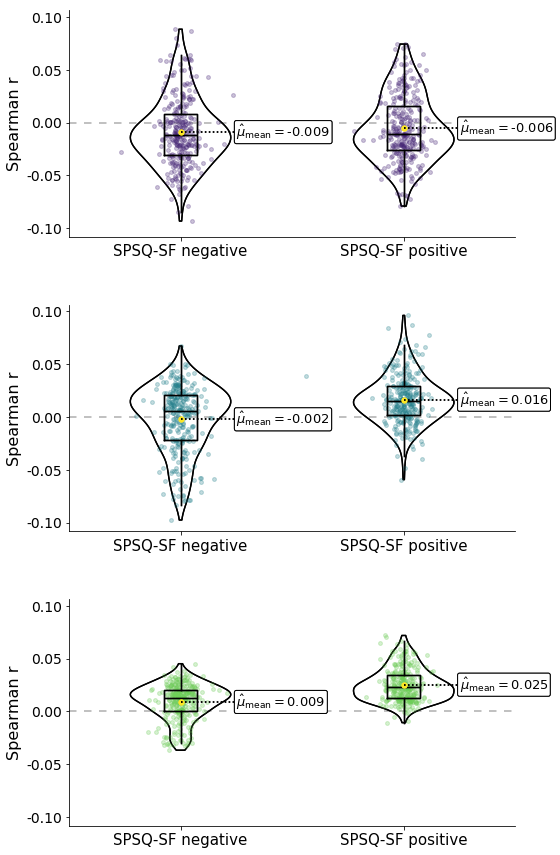

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from matplotlib.cm import viridis
import matplotlib.ticker as ticker

# Define contrasts and columns_to_plot
contrasts = ['nn', 'centrality', 'convergence'] # models
networks = ['SPSQ_pos', 'SPSQ_neg']
columns_to_plot = ['spearman_r']

# Initialize variables to store overall min and max values
overall_min = float('inf')
overall_max = float('-inf')

BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#000000"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#000000"
GREY_DARK = "#747473"
MEAN_DOT = "#fde725"

# Set colors for scatterplots
COLOR_SCALE = ["#482878", "#26828e", "#6ece58"]

# Horizontal positions for the violins. 
# They are arbitrary numbers. They could have been [-1, 0, 1] for example.
POSITIONS = [0, 1]

# Horizontal lines
HLINES = [0.0]

# Initialize a single figure and axes for all plots
fig, axs = plt.subplots(len(contrasts), 1, figsize=(8, 5 * len(contrasts)), sharey=True)

# Define colormap
cmap = viridis

# Horizontal lines that are used as scale reference
for h in HLINES:
    for ax in axs:  # Iterate over all subplots
        ax.axhline(h, color='#999999', ls=(0, (5, 5)), alpha=0.8, zorder=0)

# Loop through contrasts
for row, contrast in enumerate(contrasts):
        # Load the CSV file into a DataFrame for SPSQ_pos
        file_path_pos = f'analysis/inter-subject_representational_similarity_analysis/all_08-02-2024_roi_node_{contrast}/SPSQ_pos_isrsa_concat.csv'
        df_pos = pd.read_csv(file_path_pos)
        df_pos['network'] = 'SPSQ_pos'  # Add a new column indicating the dimension

        # Load the CSV file into a DataFrame for SPSQ_neg
        file_path_neg = f'analysis/inter-subject_representational_similarity_analysis/all_08-02-2024_roi_node_{contrast}/SPSQ_neg_isrsa_concat.csv'
        df_neg = pd.read_csv(file_path_neg)
        df_neg['network'] = 'SPSQ_neg'  # Add a new column indicating the dimension

        # Concatenate the data vertically
        df_concatenated = pd.concat([df_pos, df_neg])

        # Melt the DataFrame to combine columns_to_plot into one column
        #melted_df = pd.melt(df_concatenated, value_vars=columns_to_plot, var_name='network', value_name='activation difference')
        melted_df = df_concatenated
        
        # Get the networks, sorted alphabetically
        networks = sorted(melted_df["network"].unique())

        # y_data is a list of length 2 containing the Spearman r values for each dimension
        y_data = [melted_df[melted_df["network"] == network]["spearman_r"].values for network in networks]

        # Create jittered version of "x" (which is only 0, 1)
        jitter = 0.04
        x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
        x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]

        # Calculate offset for x-values to spread out the scatter points
        offset = 0.2 * (row - (len(contrasts) - 1) / 2)  # Adjust multiplier as needed

        # Plot 
        for col, network in enumerate(networks):
            # Get the contrast index for color assignment
            contrast_index = contrasts.index(contrast)
            # Scatterplot color according to contrast index
            scatter_color = COLOR_SCALE[contrast_index]
            
            # Violins
            violins = axs[row].violinplot(
                y_data, 
                positions=POSITIONS, 
                widths=0.45, 
                bw_method="silverman", 
                showmeans=False, 
                showmedians=False, 
                showextrema=False)

            # Customize violins
            for pc in violins['bodies']:
                pc.set_facecolor('none')
                pc.set_edgecolor('#000000')
                pc.set_linewidth(1.4)
                pc.set_alpha(1)

            # Boxplots
            medianprops = dict(
                linewidth=1.4, 
                color='#000000',
                solid_capstyle="butt")
            boxprops = dict(
                linewidth=1.4, 
                color='#000000')
            axs[row].boxplot(
                y_data,
                positions=POSITIONS, 
                showfliers = False, # Do not show the outliers beyond the caps.
                showcaps = False,   # Do not show the caps
                medianprops = medianprops,
                whiskerprops = boxprops,
                boxprops = boxprops)

            # Jittered dots
            for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
                axs[row].scatter(x, y, s = 15, color=scatter_color, alpha=0.15)

            # Mean value labels 
            means = [y.mean() for y in y_data]
            for i, mean in enumerate(means):
                # Add dot representing the mean
                axs[row].scatter(i, mean, s=25, color=MEAN_DOT, zorder=3)

                # Add line connecting mean value and its label
                axs[row].plot([i, i + 0.25], [mean, mean], ls="dotted", color="black", zorder=3)

                # Add mean value label
                axs[row].text(
                    i + 0.25,
                    mean,
                    r"$\hat{\mu}_{\rm{mean}} = $" + str(round(mean, 3)),
                    fontsize=13,
                    va="center",
                    bbox=dict(
                        facecolor="white",
                        edgecolor="black",
                        boxstyle="round",
                        pad=0.15),
                    zorder=10)  # to make sure the line is on top

        # Add labels and legend to each row
        axs[row].set_ylabel('Spearman r', fontsize=16)

        # Remove box around the plot
        axs[row].spines['top'].set_visible(False)
        axs[row].spines['right'].set_visible(False)
        
        # Increase tick font size
        axs[row].tick_params(axis='both', which='major', labelsize=14)

        # Customize y-axis tick labels to display values to a decimal point
        axs[row].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.2f}'))

        # Customize x-axis
        xlabels = [f"{network.replace('SPSQ_neg', 'SPSQ-SF negative').replace('SPSQ_pos', 'SPSQ-SF positive')}" for network in networks]
        axs[row].set_xticks(POSITIONS)
        axs[row].set_xticklabels(xlabels, size=15, ha="center", ma="center")
        #axs[row].set_xlabel("network", size=18)

        # Update overall min and max values
        overall_min = min(overall_min, melted_df['spearman_r'].min()) - 0.005
        overall_max = max(overall_max, melted_df['spearman_r'].max()) + 0.005

# Set the same y-axis limits for all subplots
for ax in axs:
    ax.set_ylim(overall_min, overall_max)

# Adjust layout to add more space between the subplots
plt.subplots_adjust(hspace=0.3)

# Save the figure
plt.savefig('analysis/plots/questionnaire_similarity_model_testing_violins.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()

# Plot heatmaps for each of the models

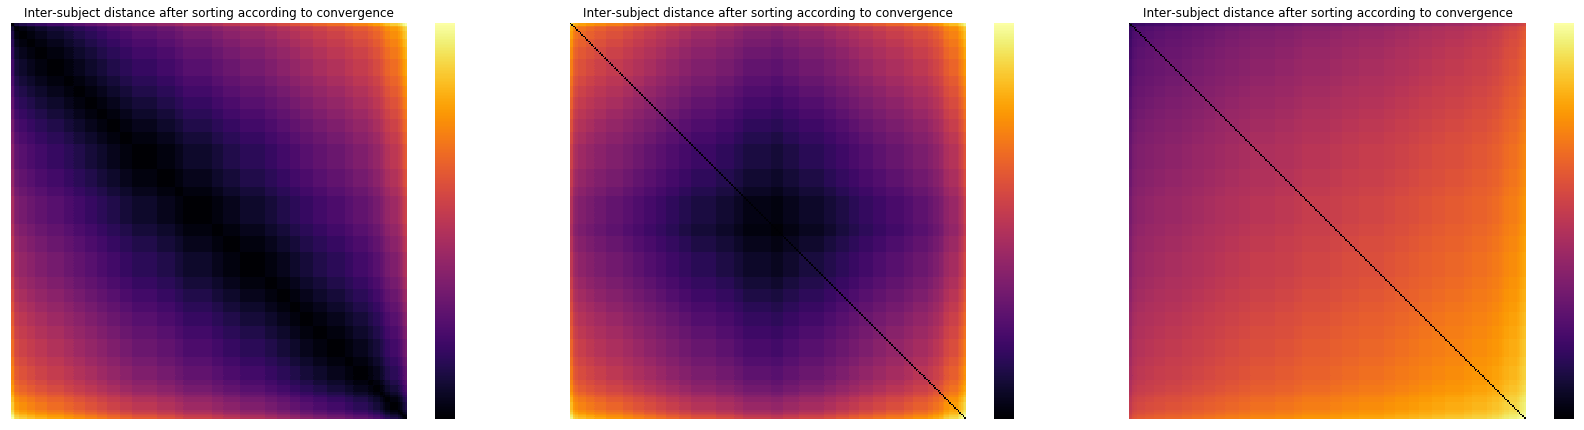

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create a sorted heatmap
def sort_heatmap(file_path, sorting_file, variable, ax, title):
    # Read the distance matrix
    distance_matrix_df = pd.read_csv(file_path, header=0, index_col=0)

    # Read the sorting file
    sorting_df = pd.read_csv(sorting_file)

    # Sort the subjects based on the specified variable in ascending order
    sorted_order = sorting_df.sort_values(by=variable, ascending=True)['subject'].tolist()

    # Reorder both the rows and columns of the distance matrix using the sorted order
    distance_matrix_df = distance_matrix_df.loc[sorted_order, sorted_order]

    # Create the heatmap with sorting
    heatmap = sns.heatmap(distance_matrix_df, ax=ax, annot=False, cmap='inferno', cbar=True, 
                          square=True, linewidths=0,  # Set linewidths to 0 to remove grid lines
                          vmin=distance_matrix_df.values.min(), vmax=distance_matrix_df.values.max())

    # Remove tick labels and tick marks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)  # Set the title
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Remove borders around the plot
    for _, spine in ax.spines.items():
        spine.set_visible(False)
        
    # Access the color bar object and remove tick marks and labels
    cbar = heatmap.collections[0].colorbar
    cbar.set_ticks([])
    cbar.ax.set_yticklabels([])
    
    # Remove grid lines
    ax.grid(False)
    
# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 6))  # 3 columns, 1 row

models = ['nn', 'centrality', 'convergence']

for i, model in enumerate(models):
    # Define the file paths and sorting file for the variables you want to use
    file_path = f'analysis/inter-subject_matrices_spsq/{model}_composite/{model}_matrix_SPSQ_neg.csv'
    sorting_file = 'analysis/SPSQ-24_all.csv'

    # Define variable and title
    variable = 'SPSQ_neg'

    # Define distance_matrix_df within the loop
    distance_matrix_df = pd.read_csv(file_path, header=0, index_col=0)

    # Call sort_heatmap function
    sort_heatmap(file_path, sorting_file, variable, axes[i], title)

# Adjust layout
plt.tight_layout()

# Save the plot as a high-resolution PNG
plt.savefig('analysis/plots/questionnaire_similarity_models_heatmaps.png', dpi=300)

# Show the plot
plt.show()
